# TRAIN
# Project 1: Navigation
## Udacity Deep Reinforcement Learning Nanodegree

### Preliminaries

Import required dependencies:

In [1]:
from agent import Agent
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import time
from unityagents import UnityEnvironment

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
plt.rcParams['figure.figsize'] = (12, 8)

Wrap the code that iterates over episodes and time-steps as a given agent trains from a given environment:

In [3]:
VERBOSE=2

In [4]:
SOLVED_SCORE=13
SOLVED_WINDOW=100

In [5]:
def train_dqn(env, 
              agent, 
              
              max_episodes=1000, 
              max_t=300,
              
              epsilon_start=0.9,
              epsilon_end=0.05, 
              epsilon_decay=0.99, 
              
              beta_start=0.4, 
              beta_end=1, 
              beta_max_episodes=350,
              
              checkpoint_name=None
             ):
    """Drives the interaction between an environment and an agent that's necessary
    to train Deep Q-Learning networks and variants.
    
    Params
    ======
        env (UnityEnvironment): the environment with which to interact
        agent (Agent): the agent to train
    
        max_episodes (int): the maximum number of training episodes; training stops early if the problem is solved
        max_t (int): the maximum number of time-steps per episode
        
        epsilon_start (float): the initial value of epsilon, for epsilon-greedy action selection
        epsilon_end (float): the final value of epsilon
        epsilon_decay (float): the multiplicative factor by which epsilon is decreased each episode
        
        beta_start (float): for Prioritzed Experience Replay, the initial value of beta for de-biasing
        beta_end (float): for Prioritized Experience Replay, the final value of beta
        beta_max_episodes (int): for Prioritized Experience Replay, the number of episodes on which to base the increments in beta        
    """
    
    epoch_size = SOLVED_WINDOW
        
    brain_name = env.brain_names[0]
        
    scores = []  # A list containing scores from each episode.
    scores_window = deque(maxlen=epoch_size)  # A deque containing the last 'epoch_size' scores.

    epsilon = epsilon_start  # Initializing epsilon.
    beta = beta_start  # Initializing beta.
    
    # Initialize various performance timer windows.
    time_taken_total_window = deque(maxlen=epoch_size)
    time_taken_env_window = deque(maxlen=epoch_size)
    time_taken_agent_window = deque(maxlen=epoch_size)    
    time_taken_agent_1_window = deque(maxlen=epoch_size)
    time_taken_agent_2_window = deque(maxlen=epoch_size)
    time_taken_agent_3_window = deque(maxlen=epoch_size)
    time_taken_agent_4_window = deque(maxlen=epoch_size)

    
    def get_print_message():
        """ A convenience function that returns a string sumarizing the prior rolling epoch's performance.
        """
        # return f'\rEpisode {i_episode}\tAvg Score: {np.mean(scores_window):.2f}\tMax Score: {np.max(scores_window):.2f}\tAvg total time: {np.mean(time_taken_total_window):.2f}\tAvg env time: {np.mean(time_taken_env_window):.2f}\tAvg agent time: {np.mean(time_taken_agent_window):.2f}\tAgent time_1_window: {np.mean(time_taken_agent_1_window):.2f} \tAgent time_2_window: {np.mean(time_taken_agent_2_window):.2f} \tAgent time_3_window: {np.mean(time_taken_agent_3_window):.2f} \tAgent time_4_window: {np.mean(time_taken_agent_4_window):.2f}'
        return f'\rEpisode {i_episode}\tAvg Score: {np.mean(scores_window):.2f}\tMax Score: {np.max(scores_window):.2f}\tAvg env time: {np.mean(time_taken_env_window):.2f}\tAvg agent time: {np.mean(time_taken_agent_window):.2f}'
    
    
    # Iterate over episodes.
    for i_episode in range(1, max_episodes+1):

        time_taken_total_start = time.process_time()    

        time_taken_env = 0
        time_taken_agent = 0

        score = 0  # Reset the score.
        
        time_taken_env_start = time.process_time()
        env_info = env.reset(train_mode=True)[brain_name]  # Reset the environment.
        state = env_info.vector_observations[0]  # Retrieve the state of the environment.
        time_taken_env += time.process_time() - time_taken_env_start

        # Iterate over time-steps.
        for t in range(max_t):

            time_taken_agent_start = time.process_time()
            action = agent.act(state, epsilon)  # Given the state, request an action from the agent.
            time_taken_agent += time.process_time() - time_taken_agent_start

            time_taken_env_start = time.process_time()
            env_info = env.step(action)[brain_name]  # Send the chosen action to the environment.
            next_state = env_info.vector_observations[0]  # Retrieve the next state from the environment.
            reward = env_info.rewards[0]  # Retrieve the reward from the environment.
            done = env_info.local_done[0]  # Determine whether the episode is done.
            time_taken_env += time.process_time() - time_taken_env_start
                
            time_taken_agent_start = time.process_time()
            agent.step(state, action, reward, next_state, done, beta=beta)  # Train the agent.
            time_taken_agent += time.process_time() - time_taken_agent_start
            
            state = next_state  # Update the state.
            score += reward  # Update the score with the reward.
            
            if done:
                break

        epsilon = max(epsilon_end, epsilon_decay * epsilon)  # Update the value of epsilon.                
        beta = min(beta_end, (beta_end - beta_start) / beta_max_episodes * i_episode + beta_start)  # Update the value of beta.
                                
        scores_window.append(score)  # Append the most recent score to the scores window.
        scores.append(score)  # Append the most recent score to all the scores.
                                
        time_taken_total_window.append(time.process_time() - time_taken_total_start)
                        
        time_taken_env_window.append(time_taken_env)
        time_taken_agent_window.append(time_taken_agent)        
        
        time_taken_agent_1_window.append(agent.time_1)
        time_taken_agent_2_window.append(agent.time_2)
        time_taken_agent_3_window.append(agent.time_3)
        time_taken_agent_4_window.append(agent.time_4)
        
        agent.reset_timers()
        
        # Print a summary of the rolling epoch's performance.
        if VERBOSE >= 3:
            print(get_print_message(), end="\t", flush=True)
            # Print a summary of the prior epoch's performance.
        if VERBOSE >= 2 and i_episode % epoch_size == 0:
            print(get_print_message())
        # Check whether the problem has been solved.
        if np.mean(scores_window) >= SOLVED_SCORE:
            if VERBOSE > 2:
                print(f'\nEnvironment solved over episodes {i_episode-SOLVED_WINDOW} to {i_episode}!\tAverage Score: {np.mean(scores_window):.2f}')
            elif VERBOSE == 2:
                print(get_print_message())
            elif VERBOSE == 1:
                print(f'{i_episode}', end=" ")
            # Give the agent an opportunity to save its weights.
            if checkpoint_name:
                agent.save(path=f'checkpoint_{checkpoint_name}.pth')
            break

    return scores

In [6]:
def visualise_single_training(title, scores):
    plt.plot(scores)
    plt.title(title)
    plt.ylabel('score')
    plt.xlabel('episode')
    plt.xlim(left=0)
    plt.xlim(right=1800)    
    plt.axhline(y=SOLVED_SCORE, color='r', linestyle='-')
    plt.axvline(x=len(scores) - SOLVED_WINDOW, color='r', linestyle='-')
    plt.show()   

## Environment

Define the environment and obtain aspects of it.

In [7]:
env = UnityEnvironment(file_name="../Banana_Linux_NoVis/Banana.x86_64")

brain_name = env.brain_names[0]
brain = env.brains[brain_name]
action_size = brain.vector_action_space_size
env_info = env.reset(train_mode=True)[brain_name]
state_size = len(env_info.vector_observations[0])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


## Single training of agents

Note: All of the agents below share the same hyperparameters. These hyperparameters were hand-tuned to optimize Agent 6, but were also found to be good choices for the other agents.

### 1. DQN agent

In [59]:
agent_1_name = 'DQN'

agent_1 = Agent(state_size=state_size, 
                action_size=action_size, 
                enable_double_dqn=False,
                enable_prioritized_experience_replay=False,
                enable_dueling_network=False
               )

In [60]:
def train_dqn_1():
    return train_dqn(env=env, agent=agent_1, 
                     max_episodes=1000, max_t=300,
                     epsilon_start=0.9, epsilon_end=0.05, epsilon_decay=0.99,
                     beta_start=0.4, beta_end=1, beta_max_episodes=350,
                     checkpoint_name="agent_1"
                    )

In [61]:
scores_1 = train_dqn_1()

Episode 100	Avg Score: 3.28	Max Score: 11.00	Avg env time: 0.31	Avg agent time: 0.39
Episode 200	Avg Score: 9.29	Max Score: 18.00	Avg env time: 0.31	Avg agent time: 0.40
Episode 282	Avg Score: 13.05	Max Score: 21.00	Avg env time: 0.31	Avg agent time: 0.41


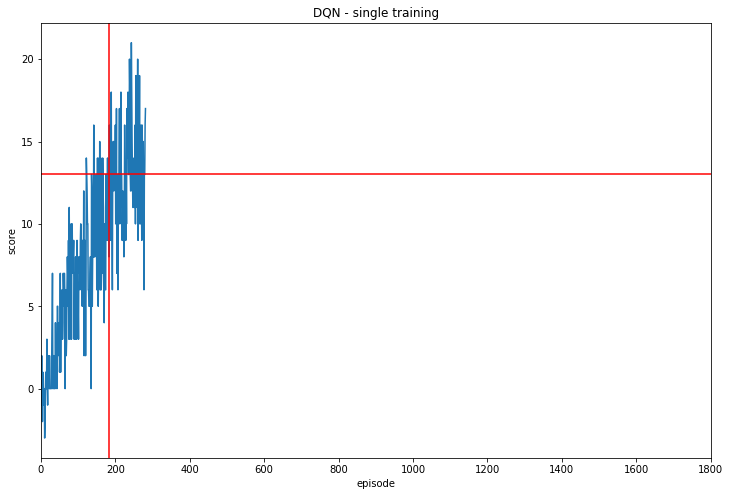

In [62]:
visualise_single_training(f'{agent_1_name} - single training', scores_1)

### 2. DQN + Double agent

In [63]:
agent_2_name = 'DQN + DDQN'

agent_2 = Agent(state_size=state_size, 
                action_size=action_size, 
                enable_double_dqn=True,
                enable_prioritized_experience_replay=False,
                enable_dueling_network=False
               )

In [64]:
def train_dqn_2():
    return train_dqn(env=env, agent=agent_2, 
                     max_episodes=1000, max_t=300,
                     epsilon_start=0.9, epsilon_end=0.05, epsilon_decay=0.99,
                     beta_start=0.4, beta_end=1, beta_max_episodes=350,
                     checkpoint_name="agent_2"
                    )

In [65]:
scores_2 = train_dqn_2()

Episode 100	Avg Score: 1.97	Max Score: 9.00	Avg env time: 0.31	Avg agent time: 0.41
Episode 200	Avg Score: 8.56	Max Score: 20.00	Avg env time: 0.31	Avg agent time: 0.42
Episode 300	Avg Score: 11.63	Max Score: 20.00	Avg env time: 0.31	Avg agent time: 0.43
Episode 363	Avg Score: 13.03	Max Score: 20.00	Avg env time: 0.31	Avg agent time: 0.43


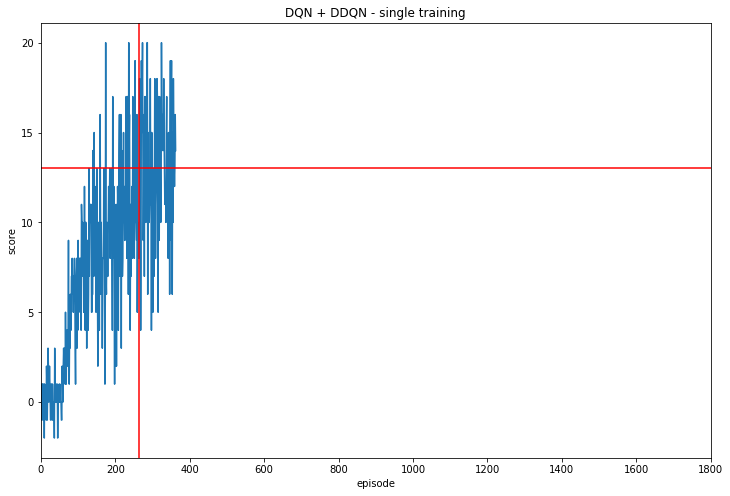

In [66]:
visualise_single_training(f'{agent_2_name} - single training', scores_2)

### 3. DQN + Prioritized Experience Replay agent

In [8]:
agent_3_name = 'DQN + PER'

agent_3 = Agent(state_size=state_size, 
                action_size=action_size, 
                enable_double_dqn=False,
                enable_prioritized_experience_replay=True,
                enable_dueling_network=False
               )

In [9]:
def train_dqn_3():
    return train_dqn(env=env, agent=agent_3, 
                     max_episodes=1000, max_t=300,
                     epsilon_start=0.9, epsilon_end=0.05, epsilon_decay=0.99,
                     beta_start=0.4, beta_end=1, beta_max_episodes=350,
                     checkpoint_name="agent_3"                     
                    )

In [10]:
scores_3 = train_dqn_3()

Episode 100	Avg Score: 1.51	Max Score: 11.00	Avg env time: 0.33	Avg agent time: 1.03
Episode 200	Avg Score: 7.96	Max Score: 19.00	Avg env time: 0.33	Avg agent time: 1.14
Episode 300	Avg Score: 12.28	Max Score: 21.00	Avg env time: 0.33	Avg agent time: 1.18
Episode 325	Avg Score: 13.05	Max Score: 23.00	Avg env time: 0.33	Avg agent time: 1.19


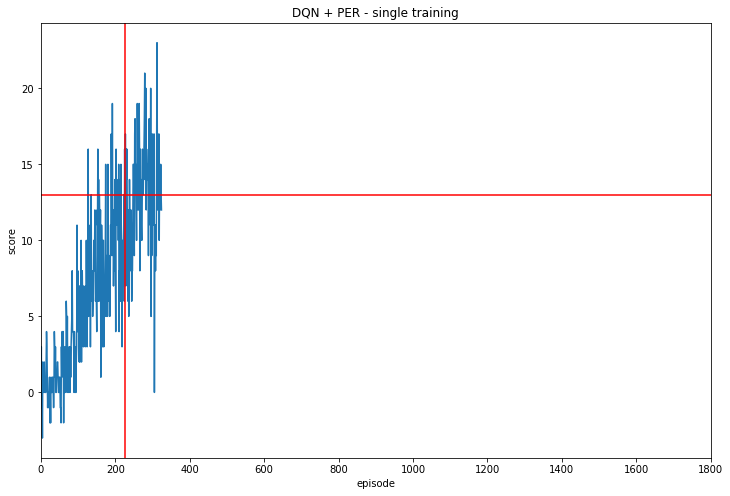

In [11]:
visualise_single_training(f'{agent_3_name} - single training', scores_3)

### 4. DQN + Dueling Network agent

In [12]:
agent_4_name = 'DQL + Duel'

agent_4 = Agent(state_size=state_size, 
                action_size=action_size, 
                enable_double_dqn=False,
                enable_prioritized_experience_replay=False,
                enable_dueling_network=True
               )

In [13]:
def train_dqn_4():
    return train_dqn(env=env, agent=agent_4, 
                     max_episodes=1000, max_t=300,
                     epsilon_start=0.9, epsilon_end=0.05, epsilon_decay=0.99,
                     beta_start=0.4, beta_end=1, beta_max_episodes=350,
                     checkpoint_name="agent_4"
                    )

In [14]:
scores_4 = train_dqn_4()

Episode 100	Avg Score: 3.69	Max Score: 12.00	Avg env time: 0.32	Avg agent time: 0.53
Episode 200	Avg Score: 10.50	Max Score: 20.00	Avg env time: 0.32	Avg agent time: 0.54
Episode 300	Avg Score: 12.68	Max Score: 21.00	Avg env time: 0.32	Avg agent time: 0.54
Episode 318	Avg Score: 13.00	Max Score: 24.00	Avg env time: 0.32	Avg agent time: 0.54


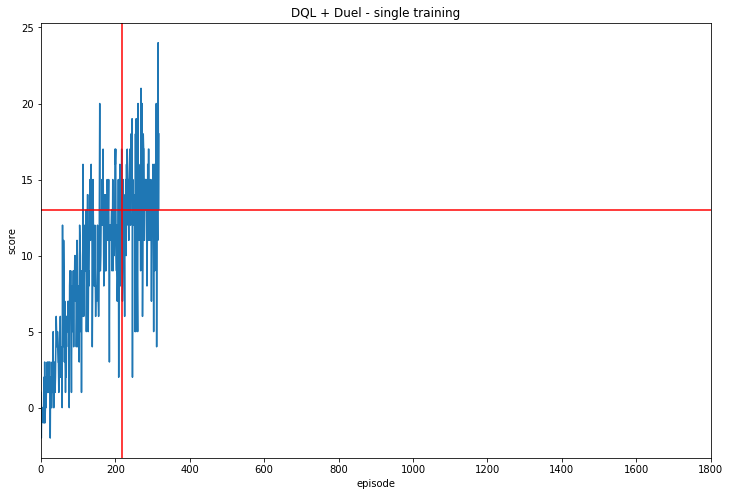

In [15]:
visualise_single_training(f'{agent_4_name} - single training', scores_4)

### 5. DQN + Double + Prioritized Experience Replay agent

In [16]:
agent_5_name = 'DQN + DDQN + PER'

agent_5 = Agent(state_size=state_size, 
                action_size=action_size, 
                enable_double_dqn=True,
                enable_prioritized_experience_replay=True,
                enable_dueling_network=False
               )

In [17]:
def train_dqn_5():
    return train_dqn(env=env, agent=agent_5, 
                     max_episodes=1000, max_t=300,
                     epsilon_start=0.9, epsilon_end=0.05, epsilon_decay=0.99,
                     beta_start=0.4, beta_end=1, beta_max_episodes=350,
                     checkpoint_name="agent_5"                     
                    )

In [18]:
scores_5 = train_dqn_5()

Episode 100	Avg Score: 3.05	Max Score: 14.00	Avg env time: 0.33	Avg agent time: 1.05
Episode 200	Avg Score: 9.31	Max Score: 18.00	Avg env time: 0.33	Avg agent time: 1.16
Episode 300	Avg Score: 12.56	Max Score: 22.00	Avg env time: 0.33	Avg agent time: 1.19
Episode 331	Avg Score: 13.01	Max Score: 22.00	Avg env time: 0.33	Avg agent time: 1.19


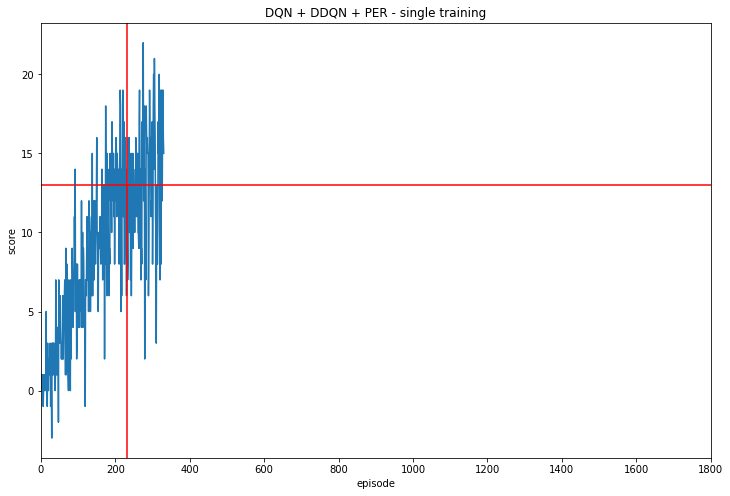

In [19]:
visualise_single_training(f'{agent_5_name} - single training', scores_5)

### 6. DQN + Double + Prioritized Experience Replay + Dueling Network agent

In [20]:
agent_6_name = 'DQL + DDQN + PER + Duel'

agent_6 = Agent(state_size=state_size, 
                action_size=action_size, 
                enable_double_dqn=True,
                enable_prioritized_experience_replay=True,
                enable_dueling_network=True
               )

In [21]:
def train_dqn_6():
    return train_dqn(env=env, agent=agent_6, 
                     max_episodes=1000, max_t=300,
                     epsilon_start=0.9, epsilon_end=0.05, epsilon_decay=0.99,
                     beta_start=0.4, beta_end=1, beta_max_episodes=350,
                     checkpoint_name="agent_6"                     
                    )

In [22]:
scores_6 = train_dqn_6()

Episode 100	Avg Score: 3.13	Max Score: 12.00	Avg env time: 0.33	Avg agent time: 1.19
Episode 200	Avg Score: 10.23	Max Score: 19.00	Avg env time: 0.33	Avg agent time: 1.31
Episode 300	Avg Score: 12.90	Max Score: 21.00	Avg env time: 0.33	Avg agent time: 1.36
Episode 302	Avg Score: 13.00	Max Score: 21.00	Avg env time: 0.33	Avg agent time: 1.36


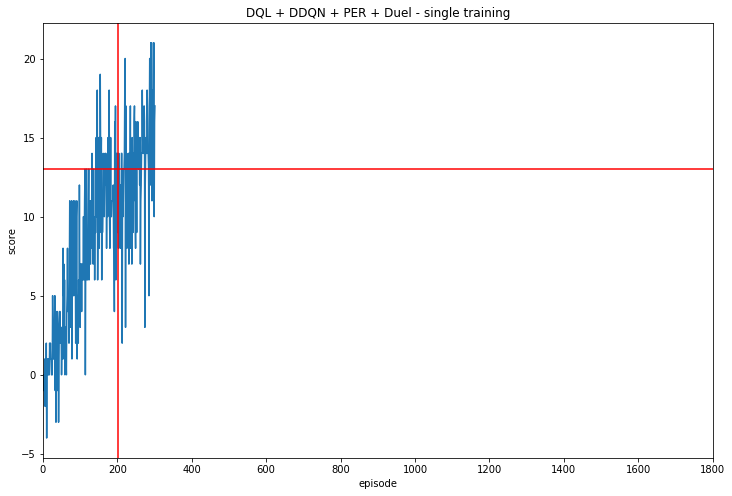

In [23]:
visualise_single_training(f'{agent_6_name} - single training', scores_6)

## Multiple trainings of agents

In [25]:
VERBOSE=1

In [26]:
n_trainings = 15

In [32]:
def perform_multiple_trainings(train_function, file_name):
    results = np.array([len(train_function()) - SOLVED_WINDOW for _ in range(n_trainings)])
    np.save(file_name, results)
    return results    

In [38]:
required_episodes_1 = perform_multiple_trainings(train_dqn_1, 'required_episodes_1')
# required_episodes_1 = np.load('required_episodes_1.npy')

139 153 133 127 142 170 154 164 134 146 145 125 127 135 147 

In [39]:
required_episodes_2 = perform_multiple_trainings(train_dqn_2, 'required_episodes_2')

155 195 157 153 153 126 162 137 139 125 152 167 141 128 140 

In [40]:
required_episodes_3 = perform_multiple_trainings(train_dqn_3, 'required_episodes_3')

171 157 197 161 145 172 144 137 165 147 134 147 168 164 144 

In [41]:
required_episodes_4 = perform_multiple_trainings(train_dqn_4, 'required_episodes_4')

158 144 183 132 131 133 151 131 143 140 122 140 130 129 144 

In [42]:
required_episodes_5 = perform_multiple_trainings(train_dqn_5, 'required_episodes_5')

164 159 135 160 152 136 137 148 167 153 156 192 132 130 127 

In [43]:
required_episodes_6 = perform_multiple_trainings(train_dqn_6, 'required_episodes_6')

211 169 144 136 125 133 168 144 131 136 175 125 142 125 158 

In [44]:
required_episodes = {
    agent_1_name: required_episodes_1,
    agent_2_name: required_episodes_2,
    agent_3_name: required_episodes_3,
    agent_4_name: required_episodes_4,
    agent_5_name: required_episodes_5,
    agent_6_name: required_episodes_6
}

In [45]:
def describe_and_visualise_required_episodes(d):    
    ks = list(d.keys())
    df = pd.DataFrame({'approach': ks[0], 'required_episodes': d[ks[0]]})
    for k in ks[1:]:
        additional_df = pd.DataFrame({'approach': k, 'required_episodes': d[k]})
        df = df.append(additional_df)
        
    title = f'Distribution of required episodes over {n_trainings} trainings'
    ax = sns.violinplot(x="approach", y="required_episodes", data=df).set_title(title)
    
    return df.groupby('approach').describe().unstack(1)

                          approach               
required_episodes  count  DQL + DDQN + PER + Duel     15.000000
                          DQL + Duel                  15.000000
                          DQN                         15.000000
                          DQN + DDQN                  15.000000
                          DQN + DDQN + PER            15.000000
                          DQN + PER                   15.000000
                   mean   DQL + DDQN + PER + Duel    148.133333
                          DQL + Duel                 140.733333
                          DQN                        142.733333
                          DQN + DDQN                 148.666667
                          DQN + DDQN + PER           149.866667
                          DQN + PER                  156.866667
                   std    DQL + DDQN + PER + Duel     24.047176
                          DQL + Duel                  14.992697
                          DQN                         

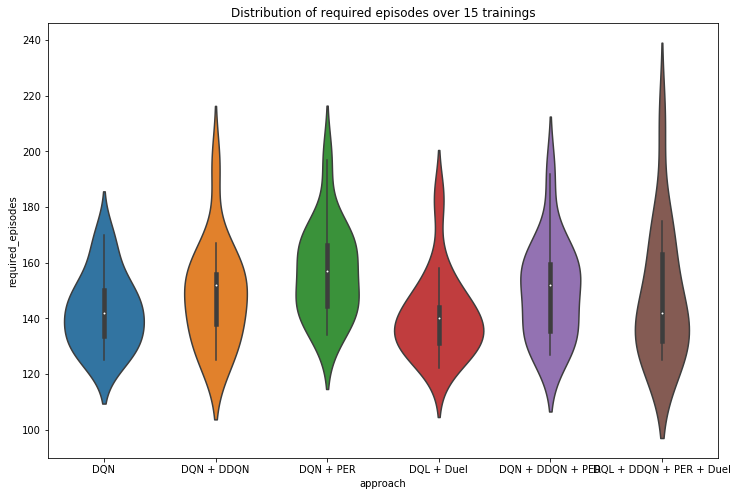

In [46]:
describe_and_visualise_required_episodes(required_episodes)